<a href="https://colab.research.google.com/github/vinicfiav/Data_Science/blob/main/10real_Embeddings_AnalysisViniciusCordeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10 Vinicius Cordeiro**

# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [1]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.cluster import HDBSCAN
from sentence_transformers import SentenceTransformer

In [3]:
# Verifica se uma GPU está disponível e define o dispositivo
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# Carrega o modelo pré-treinado para inglês
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model = SentenceTransformer(model_name, device=device)

print(f"Dimensão do embedding: {model.get_sentence_embedding_dimension()}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Dimensão do embedding: 384


In [5]:
sentence_embeddings = model.encode(sentences)
print(f"Shape da matriz de embeddings: {sentence_embeddings.shape}")
print(f"Embedding da primeira sentença:\n{sentence_embeddings[0][:10]}...")

Shape da matriz de embeddings: (88, 384)
Embedding da primeira sentença:
[-0.05245963 -0.07178463  0.0277141   0.01968163  0.00380771 -0.03920021
 -0.07099454 -0.00496351  0.0350052  -0.10759939]...


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

embeddings_2d_pca = pca.fit_transform(sentence_embeddings)


In [7]:
embeddings_2d_pca.shape

(88, 2)

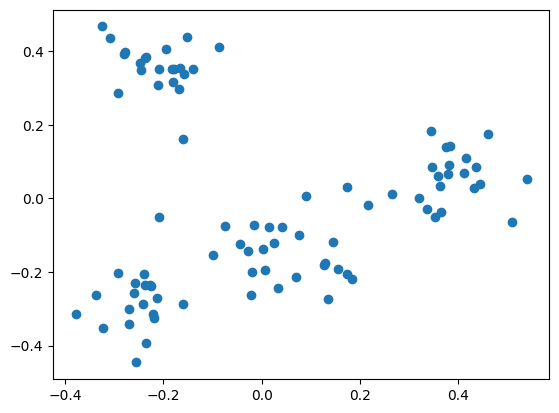

In [8]:
fig, ax = plt.subplots()
ax.scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1])

### Analise qualitativamente se há separação entre textos de temas distintos.
Há separação entre textos e seria possível agrupá-los em temas distintos, mas não seria eficaz pois há muitos pontos distantes dos seus centróides e se aproximam demais dos outros.

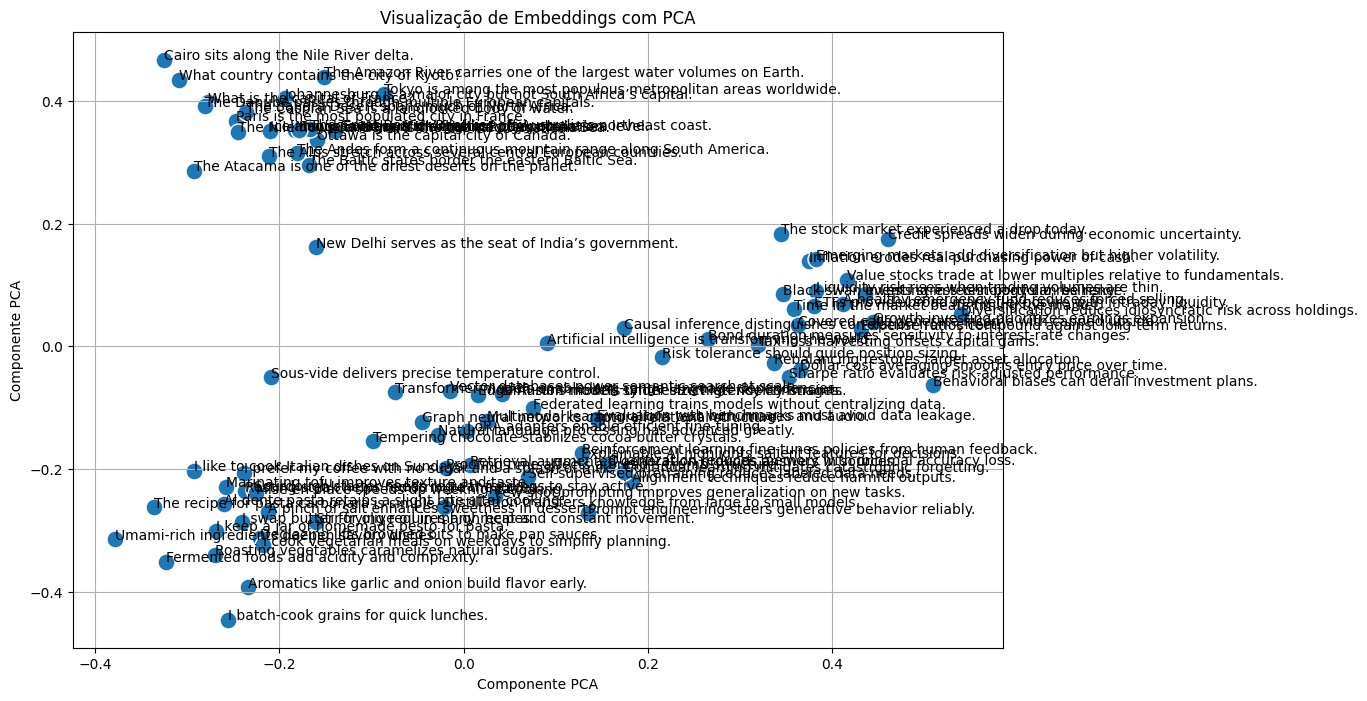

In [9]:
# Cria um DataFrame para a plotagem
df_pca = pd.DataFrame({
    'x': embeddings_2d_pca[:, 0],
    'y': embeddings_2d_pca[:, 1],
    'sentence': sentences
})

# Plota os resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x='x', y='y', s=150)

# Adiciona anotações aos pontos
for i in range(df_pca.shape[0]):
    plt.text(
        df_pca.x[i],
        df_pca.y[i],
        df_pca.sentence[i],
        ha='left',
        size=10,
        color='black',
        alpha=1.0,
        weight='normal'
    )

plt.title('Visualização de Embeddings com PCA')
plt.xlabel('Componente PCA')
plt.ylabel('Componente PCA')
plt.grid(True)
plt.show()

## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aplica o t-SNE para reduzir a dimensionalidade para 2 componentes
# A perplexidade pode ser ajustada; um valor entre 5 e 50 é comum.
# Como temos poucas amostras, um valor baixo é mais apropriado.
tsne = TSNE(n_components=2, perplexity=20, random_state=42, init='random', learning_rate=200)
embeddings_2d_tsne = tsne.fit_transform(sentence_embeddings)

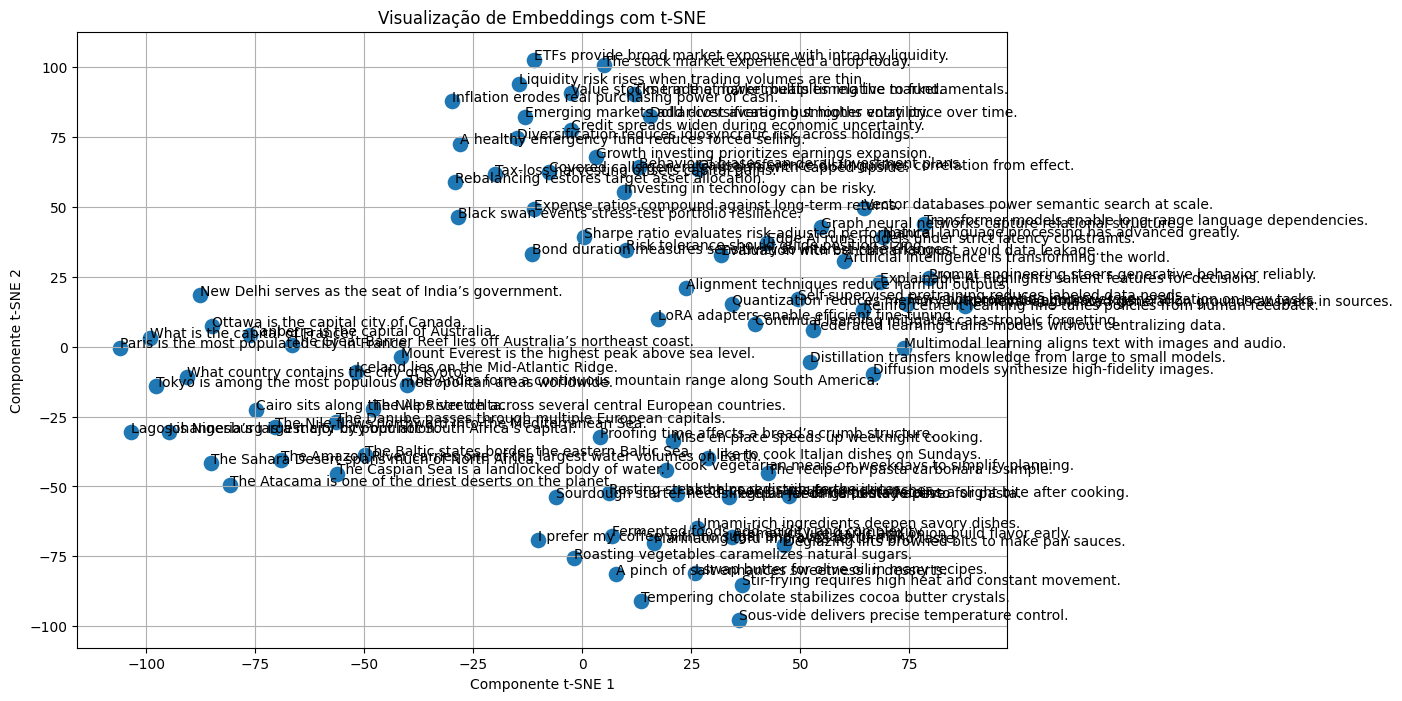

In [11]:
# Cria um DataFrame para a plotagem
df_tsne = pd.DataFrame({
    'x': embeddings_2d_tsne[:, 0],
    'y': embeddings_2d_tsne[:, 1],
    'sentence': sentences
})

# Plota os resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='x', y='y', s=150)

# Adiciona anotações aos pontos
for i in range(df_tsne.shape[0]):
    plt.text(
        df_tsne.x[i],
        df_tsne.y[i],
        df_tsne.sentence[i],
        ha='left',
        size=10,
        color='black',
        alpha=1.0,
        weight='normal'
    )

plt.title('Visualização de Embeddings com t-SNE')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.grid(True)
plt.show()

### Visualize o mapa e observe se os textos semelhantes ficam próximos.
Os textos semelhantes ficam próximos e se agrupam por temas, se distanciando de textos com temas diferentes.

## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

In [29]:
embeddings_2d_umap = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit(sentence_embeddings)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


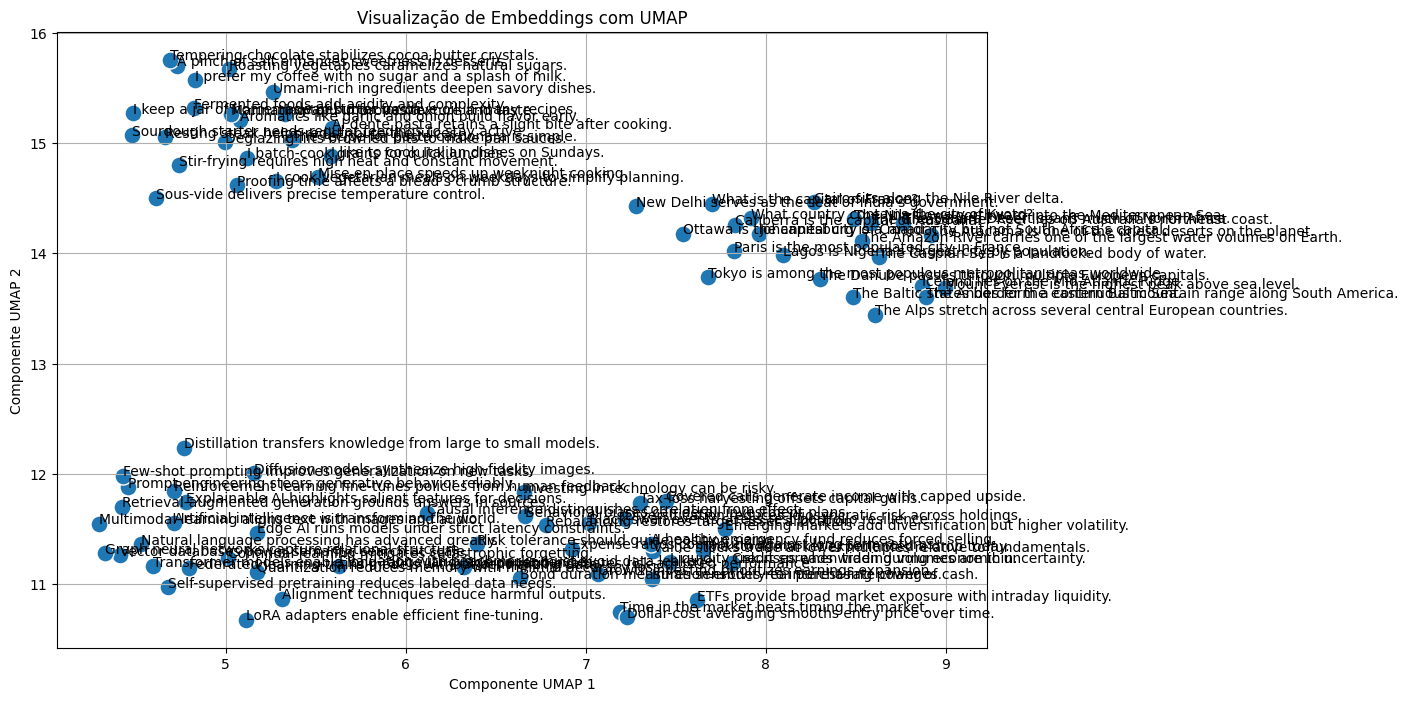

In [30]:
# Cria um DataFrame para a plotagem
df_umap = pd.DataFrame({
    'x': embeddings_2d_umap.embedding_[:, 0],
    'y': embeddings_2d_umap.embedding_[:, 1],
    'sentence': sentences
})

# Plota os resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_umap, x='x', y='y', s=150)

# Adiciona anotações aos pontos
for i in range(df_umap.shape[0]):
    plt.text(
        df_umap.x[i],
        df_umap.y[i],
        df_umap.sentence[i],
        ha='left',
        size=10,
        color='black',
        alpha=1.0,
        weight='normal'
    )

plt.title('Visualização de Embeddings com UMAP')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.grid(True)
plt.show()

### Compare visualmente com os resultados do PCA e t-SNE.
A divisão dos grupos é bem definida, tal como no t-NSE, mas estão visualmente mais separados.

## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

## Modelo para criar os clusters

calcule a distancia dos cluster JÁ identificados

In [46]:
def classificar_texto(texto: str):
  texto_embedding = model.encode(texto)
  texto_2D = embeddings_2d_umap.transform(texto_embedding.reshape(1,-1))
  cluster = kmeans.predict(texto_2D)
  return named_cluster.get(cluster[0])

### Identificando os clusters

essa célula foi feita com a função 'classificar_texto' antes dela retornar os clusters nomeados e assim conseguimos identificar cada cluster com base num texto conhecido retirado do gráfico acima. Nosso resultado foi
- [1] Gastronomia
- [2] Mercado de ações
- [0] Aprendizado de Máquina
- [3] Geografia

como mostramos na imagem abaixo

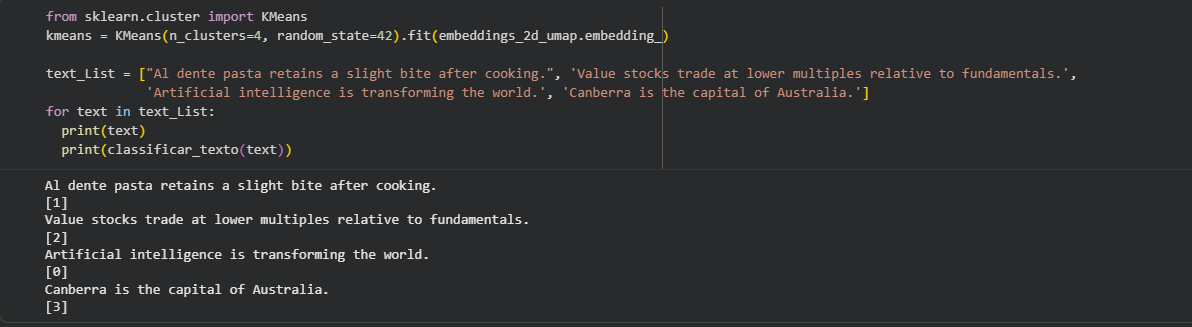

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(embeddings_2d_umap.embedding_)

text_List = ["Al dente pasta retains a slight bite after cooking.", 'Value stocks trade at lower multiples relative to fundamentals.',
             'Artificial intelligence is transforming the world.', 'Canberra is the capital of Australia.']
for text in text_List:
  print(text)
  print(classificar_texto(text))

Al dente pasta retains a slight bite after cooking.
Gastronomy
Value stocks trade at lower multiples relative to fundamentals.
Stock Market
Artificial intelligence is transforming the world.
Machine Learning
Canberra is the capital of Australia.
Geography


### Nomeando os clusters

In [53]:
named_cluster = {0:'Machine Learning', 1:'Gastronomy', 2:'Stock Market', 3:'Geography'}

## Teste:

In [51]:

classificar_texto("Melted chocolate tastes better")

'Gastronomy'